In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import manifold 


In [4]:
df = pd.read_csv('data/Alice.csv', sep=",")
df.shape

(11, 7)

In [5]:
df = df.pivot_table(index="Name", values="Revolving Utilization")
df = df.T
distance = lambda column1, column2: pd.np.linalg.norm((column1 - column2).fillna(0))
distances = df.apply(lambda column2: df.apply(lambda column1: distance(column1, column2)))

<ipython-input-5-20f020108699>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  distance = lambda column1, column2: pd.np.linalg.norm((column1 - column2).fillna(0))


In [6]:
mds = manifold.MDS(n_components=2, dissimilarity='precomputed', random_state=6)
results = mds.fit(distances)
coords = results.embedding_

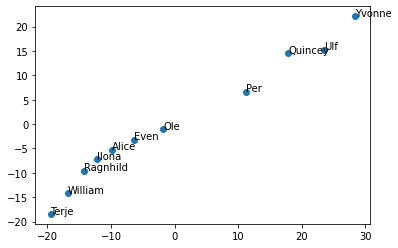

In [7]:
plt.scatter(coords[:,0],coords[:,1], marker='o')

for label, x, y in zip(df.columns.values, coords[:,0],coords[:,1]):
    plt.annotate(
        label,
        xy = (x,y))